In [535]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

#Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# Data Analytics Insurance Cost Project
By: Chuan Yong Guo, Sijia Hao, Prajesh Patel

### Insurance Costs In America

One of the primary concern many Americans face today with respect to their health is the cost of health insurance. The cost of health insurance varies from person to person, and is affected by multiple factors. The average citizen living in the United States of America can expect to pay around $456 - $1152 per month ($5472 - $13824 per year) for health insurance. The cost of health insurance is affected by a number of demographics, such as a person's age, location, tobacco usage, and whether they have a family or not. The purpose of this project is to determine if a person's demographics can be used to predict the cost of health insurance. The predicted cost of health insurance can be used as one indication of the person's overall health. The question we aim to answer is: What do our demographics tell us about our health?

Source 1: https://www.valuepenguin.com/average-cost-of-health-insurance

Source 2: https://www.ehealthinsurance.com/resources/individual-and-family/how-much-does-individual-health-insurance-cost#:~:text=BY%20Anna%20Porretta%20Updated%20on%20October%2001%2C%202022&text=In%202020%2C%20the%20average%20national,wide%20selection%20of%20health%20plans.

### Dataset Features

In order to predict the cost of health insurance, which will act as an indication of one's health, we will explore a dataset which contains information about health insurance costs and demographics for citizens living in USA. Below details a quick description of each feature in our dataset. 

Features:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

Source 3: https://www.kaggle.com/datasets/mirichoi0218/insurance

### Explanatory Data Analysis

With our target set to insurance charges, we will be using a dataset with demographic features for American citizens to create a predictive model. Below details the step by step procedure of explanatory data analysis performed to prepare the dataset for modelling. 
1. Convert features into correct datatypes for processing. 
2. Visualize distributions of numerical features to identify outliers. 
3. Check for collinearity between numerical feature using a correlation matrix.
4. Visualize distribution of categorical features to identify outliers. 
5. Use One-Hot Encoding to transform categorical features. 
6. Split the dataset into training data and test data. 
7. Create a predictive model using the training data and test the effectiveness of the model using the test data. 
8. Interpret results obtained from exploratory data analysis and modelling. 

In [536]:
#Import dataset
df = pd.read_csv("insurance.csv")
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## 1. Convert features into correct datatypes for processing. 

In [537]:
#Obtain some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [538]:
#Convert categorical variables from object datatype to category datatype
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')
df['children'] = df['children'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   category
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(4), float64(2), int64(1)
memory usage: 37.4 KB


The features 'sex', 'smoker', and 'region' are categorical features, so they are converted from object datatype to category datatype for processing. 

The feature 'children' also needs to be converted into a category datatype because it is also a categorical feature, this is logical because it is impossible to have half a child.

## 2. Visualize distributions of numerical features to identify outliers. 

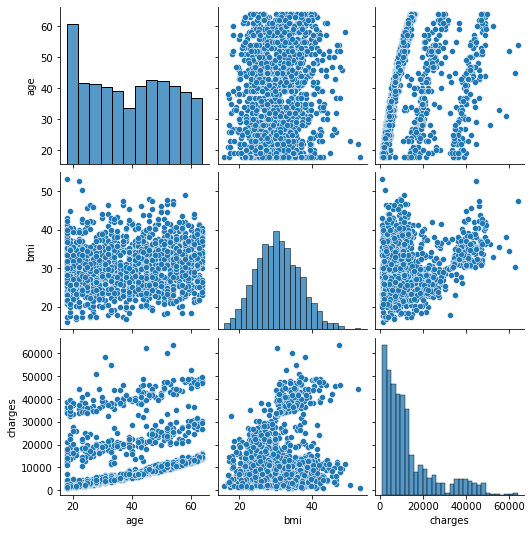

In [539]:
#Visualize pairplot
sns.pairplot(df)

In [540]:
#Obtain descriptive statistics for numerical features
df.describe()

age          bmi       charges
count  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397  13270.422265
std      14.049960     6.098187  12110.011237
min      18.000000    15.960000   1121.873900
25%      27.000000    26.296250   4740.287150
50%      39.000000    30.400000   9382.033000
75%      51.000000    34.693750  16639.912515
max      64.000000    53.130000  63770.428010

In [541]:
#Remove numerical outlier
df = df[df['charges'] <= 60000]

Based on the pairplot and histograms of numerical features, there doesn't appear to be any notable outliers that should be dropped for 'age' and 'bmi'. The feature 'age' closely follows an uniform distribution with a range of 18-64 years old. This is good because it means out dataset has a good representation for all ages of adults. The feature 'bmi' follows a normal distribution, which is a good indication that our dataset is a good sample of a normal population. The feature 'charges' follows a log normal distribution, based on the pairplots there appears to be some outliers of 'charges' exceeding $60000, these outliers can be dropped to potentially improve modelling. 

## 3. Check for collinearity between numerical feature using a correlation matrix.

In [542]:
# Correlation Matrix
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

Based on the correlation matrix, there isn't any significant correlation between 'age' and 'bmi', so there is no notable collinearity between our numerical features, meaning we don't need to drop any of these features. 

## 4. Visualize distribution of categorical features to identify outliers. 

<AxesSubplot:xlabel='children', ylabel='count'>

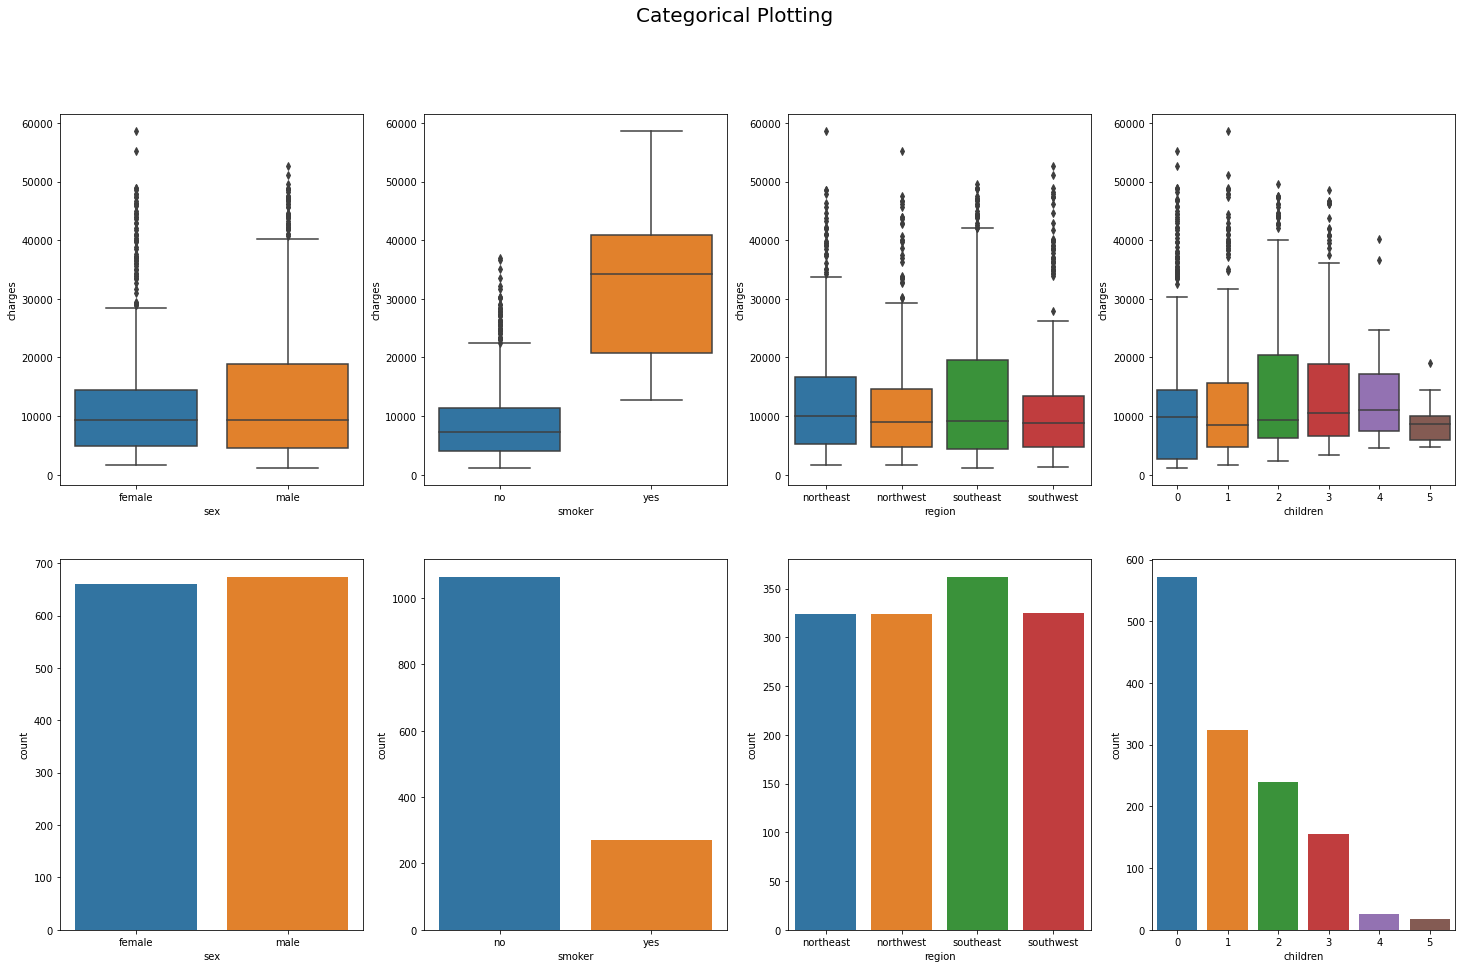

In [543]:
#Print boxplots
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(25,15))
fig.suptitle("Categorical Plotting", fontsize=20)
sns.boxplot(x="sex", y="charges", data=df,ax=ax[0,0])
sns.boxplot(x="smoker", y="charges", data=df,ax=ax[0,1])
sns.boxplot(x="region", y="charges", data=df,ax=ax[0,2])
sns.boxplot(x="children", y="charges", data=df,ax=ax[0,3])
sns.countplot(x="sex", data=df,ax=ax[1,0])
sns.countplot(x="smoker", data=df,ax=ax[1,1])
sns.countplot(x="region", data=df,ax=ax[1,2])
sns.countplot(x="children", data=df,ax=ax[1,3])

In [544]:
#Remove categorical outliers

df = df[df['children'] != 4]
df = df[df['children'] != 5]
df['children'] = pd.Series(df['children']).cat.remove_unused_categories()

Now that the numerical features are taken care of, we can look at the categorical features. We used boxplots for each categorical feature to check for correlation with our target feature 'charges', and countplot for each categorical feature to check for sampling bias within our dataset. 

Based on the boxplot for 'sex' there isn't any significant difference between males and females with respect to 'charges', this means that there is no bias with respect to gender. Based on the countplot for 'sex', the number of males and females are about equal, meaning there was no sampling bias toward gender in our dataset. 

Based on the boxplot for 'smoker', being a smoker significantly increases 'charges', this makes sense because insurance costs for individuals who smoke are higher than individuals who don't smoke. Based on the countplot for 'smoker', there appears to be a sampling bias for non-smokers, this is likely due to the fact that fewer smokers are willing to disclose information about their health because their health is usually worse than the average person. 

The boxplot and countplot for 'region' show no indication of any bias between the 4 regions. 

Based on the boxplot for 'children', 'charges' seems to increase as number of children increases, which makes sense, since more children means higher insurance costs. However, 'charges' begin to decrease for 4 and 5 children. This is likely due to the relatively low amount of data for 4 and 5 children, as indicated by the countplot for 'children'. Since there are not enough samples of individuals with 4 or 5 children, we've decided to drop these individuals as outliers. 


## 5. Use One-Hot Encoding to transform categorical features. 

In [545]:
#Convert feature 'children' back into int64 datatype
df['children'] = df['children'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1292 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1292 non-null   int64   
 1   sex       1292 non-null   category
 2   bmi       1292 non-null   float64 
 3   children  1292 non-null   int64   
 4   smoker    1292 non-null   category
 5   region    1292 non-null   category
 6   charges   1292 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 54.7 KB


In [546]:
#Perform One-Hot encoding on categorical features that are Nominal Data only
df = pd.get_dummies(df)
df.head()

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

In [547]:
#Drop the first column of each feature after one-hot encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

There are 4 features that are categorical features in our dataset; 'sex', 'smoker', 'region', and 'children'. The features 'sex', 'smoker', and 'region' are nominal data, meaning the data doesn't have any implied order. These 3 nominal data can be converted to numerical values using One-Hot Encoding. The first column of each of these 3 features will also be dropped to prevent inventing new data that didn't exist in our original data. 

The last categorical feature, 'children', is ordinal data, meaning there is an implied order, because of this, One-Hot encoding cannot be used for this feature. Unfortunately, the pd.get_dummies() function performs One-Hot encoding on all category datatypes in our dataset. In order to circumvent this, we converted the feature 'children' back into int64 datatype before we performed One-Hot Encoding on our dataset. 

## 6. Split the dataset into training data and test data. 

In [548]:
#Seperate dependent variable(target feature) and explanatory variables(predictive features) into 2 arrays
y = np.array(df["charges"]).reshape(-1,1)
dfx = df.drop(columns=["charges"])
x = np.array(dfx)
print(y.shape, x.shape)

#Split and train
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)


(1292, 1) (1292, 11)


In order to create a model to predict 'charges' using our features, we split our dataset randomly into 2 portions, 70% of our data will be used to train a predictive model, and 30% of our data will be used to test that model.

## 7. Create a predictive model using the training data and test the effectiveness of the model using the test data. 

In [549]:
#Generate model
model = LinearRegression().fit(xTrain,yTrain)

#Get RMSE and R-squared
r_sq = model.score(xTest, yTest)
print('R-squared:', r_sq)

ypred = model.predict(xTest)
print('RMSE:', mean_squared_error(ypred, yTest, squared=False))

#Get Y-intercept and Coefficients
print('Intercept:', model.intercept_[0])
print('Coefs:', model.coef_[0])

R-squared: 0.7794595330531038
RMSE: 5792.555696197887
Intercept: -835.9820443450008
Coefs: [   263.5375968     330.6055423     452.40649314    158.90858314
   -158.90858314 -11809.70359083  11809.70359083    513.57493033
    509.35206704   -831.6387258    -191.28827157]


Upon creating a linear regression model, the R-squared is about 0.70-0.80 and the RMSE is about 6000. The R-squared indicates that there is a strong correlation between our demographic features and insurance charges. The RMSE value indicates that our model is decent at predicting 'charges' given that the average 'charges' is around 13000. Another thing we've noticed during our modelling is that dropping any of the predictive features reduces the R-squared of our model and increases the RMSE. As such, we have decided to keep all features to maintain the accuracy of our model. 

## 8. Interpret results obtained from the exploratory data analysis and modelling. 

In conclusion, we can see that for American adults aged 18-64, their insurance charges is determined by their age, BMI, sex, location in the United States, tobbacco usage, and the number of children they have. Since insurance charges are an indication of a person's overall health, this means that a person's demographics can also be used to determine a person's overall health. 

On another note, there appears to be some sampling bias in our dataset. This is indicated by the fact that there are noticably less non-smokers than there are smokers in our dataset. Similarly, there are very few individuals with 4 or 5 children in out dataset. One possible explanation for this is that individuals with high insurance costs are not as willing to disclose information about their health. Further research on the relationship between demographics and health could be conducted if a more balanced sample is provided. 